In [1]:
import pandas as pd
#import imblearn
#import seaborn as sns
import BayesLib as bl
#import os

from sklearn.datasets import make_classification
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest, f_classif, chi2

#from collections import Counter
#from numpy import where
#from matplotlib import pyplot
#from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import SMOTENC
#from imblearn.over_sampling import BorderlineSMOTE 
#from imblearn.over_sampling import SVMSMOTE
#from imblearn.over_sampling import ADASYN 
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.pipeline import Pipeline
from time import time

In [2]:
#abriendo el conjunto de datos desde un archivo CSV y asignandolo los datos al DataFrame "df"
df = pd.read_csv('dataset_c.csv', sep=';', error_bad_lines=False)

In [3]:
%%capture
#Eliminando variables que no aportan al análisis
df = df.drop([
    'rut', 'usuario', 'correo', 'nombre', 'profesor', 
    'i1', 'f1', 's1', 
    'i2', 'f2', 's2',
    'i3', 'f3', 's3', 
    'i4', 'f4', 's4', 
    'i5', 'f5', 's5', 
    'i6', 'f6', 's6',
    'sol1', 'sol2', 'sol3', 'sol4',
    'tarea1', 'tarea2',
    'controles', 'np', 'examen'], axis=1)

In [4]:
#Estadísticas de la variable "programa"
serie = df['programa'].value_counts(normalize=True, ascending=True)*100
print(serie)

#Transformación numérica de la variable "programa"
for i in range(len(serie)):
    df["programa"] = df["programa"].str.replace(serie.index[i], str(i+1))
  
serie = df['programa'].value_counts(normalize=True, ascending=True)*100
print(serie)

df['programa'] = df['programa'].astype('int')

INGENIERIA INDUSTRIAL                       7.563025
INGENIERIA CIVIL INFORMATICA               16.806723
INGENIERIA CIVIL INDUSTRIAL                36.974790
INGENIERIA EN COMPUTACION E INFORMATICA    38.655462
Name: programa, dtype: float64
1     7.563025
2    16.806723
3    36.974790
4    38.655462
Name: programa, dtype: float64


In [5]:
#Estadísticas de la variable "estado"
serie = df['estado'].value_counts(normalize=True, ascending=False)*100
print(serie)

#Transformacíon numérica de la variable "estado"
for i in range(len(serie)):
    df["estado"] = df["estado"].str.replace(serie.index[i], str(i))

serie = df['estado'].value_counts(normalize=True, ascending=False)*100
print(serie)

df['estado'] = df['estado'].astype('int')

A    58.823529
R    41.176471
Name: estado, dtype: float64
0    58.823529
1    41.176471
Name: estado, dtype: float64


In [6]:
df = df.loc[:, ['lt', 'tt', 'pt', 'game_score', 
                'op1','op2', 'op3', 'op4', 'op5', 'op6',
                'sv1','sv2','sv3','sv4','sv5','sv6',
                'score', 'score_a', 'score_p', 'score_d', 'score_s',
                'programa', 'final', 'estado']]

In [7]:
binsNotas = 7
binsOtros = 5

valor_discreto = KBinsDiscretizer(n_bins=binsOtros, encode='ordinal', strategy = "kmeans").fit_transform(df[['lt']])
df[['lt']] = valor_discreto

valor_discreto = KBinsDiscretizer(n_bins=binsOtros, encode='ordinal', strategy = "kmeans").fit_transform(df[['tt']])
df[['tt']] = valor_discreto

puntaje_juego =  KBinsDiscretizer(n_bins=binsOtros, encode='ordinal', strategy = "kmeans").fit_transform(df[['pt']])
df[['pt']] = valor_discreto

puntaje_juego =  KBinsDiscretizer(n_bins=binsOtros, encode='ordinal', strategy = "kmeans").fit_transform(df[['game_score']])
df[['game_score']] = valor_discreto

nota_final =  KBinsDiscretizer(n_bins=binsNotas, encode='ordinal', strategy = "kmeans").fit_transform(df[['final']])
df[['final']] = valor_discreto

In [8]:
#Aplicando selección de variables univariate
X_univariate = SelectKBest(f_classif, k=10).fit(df, df.loc[:, 'estado'])   
selectK_mask = X_univariate.get_support()
df = df[df.columns[selectK_mask]]

INICIO DE SECCION DE ENTRENAMIENTO, FOLD:  1
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]


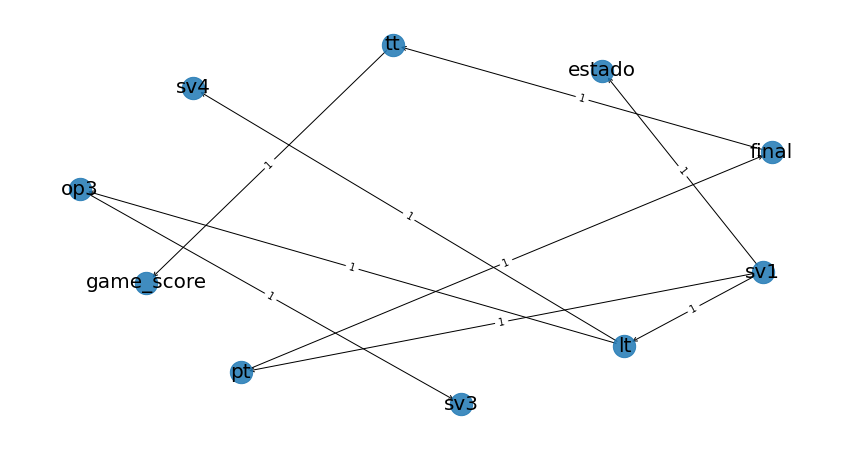

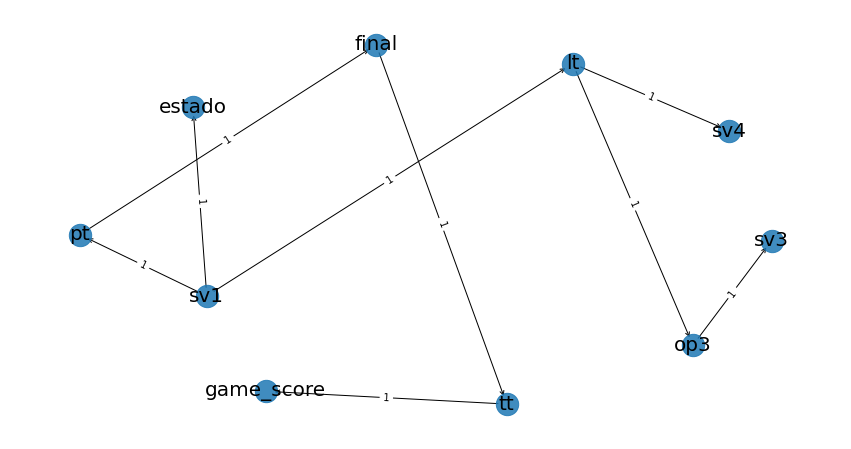

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]




0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [01:00, ?it/s]
Finding Elimination Order: : : 0it [01:20, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [01:40, ?it/s]

FILA N°: 1 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op3":1, "sv1":1, "sv3":1, "sv4":1, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 2 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op3":1, "sv1":1, "sv3":1, "sv4":1, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 3 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op3":0, "sv1":1, "sv3":0, "sv4":1, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estad


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 9 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op3":1, "sv1":1, "sv3":1, "sv4":1, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 10 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op3":0, "sv1":1, "sv3":0, "sv4":1, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 11 -> P("Estado" | [{"lt":0.0, "tt":1.

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [01:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [01:30, ?it/s]
Finding Elimination Order: : : 0it [01:40, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 13 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op3":1, "sv1":1, "sv3":1, "sv4":1, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 14 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op3":1, "sv1":1, "sv3":1, "sv4":1, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 15 -> P("Estado" | [{"lt":0.0, "tt":1

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]

Finding Elimination Order: : : 0it [01:30, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 18 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op3":1, "sv1":1, "sv3":1, "sv4":1, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 19 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op3":1, "sv1":1, "sv3":1, "sv4":1, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 20 -> P("Estado" | [{"lt":1.0, "tt":0

0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [01:20, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 22 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op3":0, "sv1":1, "sv3":0, "sv4":0, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 23 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op3":0, "sv1":1, "sv3":0, "sv4":1, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 24 -> P("Estado" | [{"lt":1.0, "tt":0

0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [01:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 27 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op3":1, "sv1":1, "sv3":1, "sv4":1, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 28 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op3":0, "sv1":1, "sv3":0, "sv4":1, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 29 -> P("Estado" | [{"lt":0.0, "tt":0


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [01:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 32 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op3":0, "sv1":1, "sv3":0, "sv4":0, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 33 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op3":0, "sv1":1, "sv3":0, "sv4":1, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 34 -> P("Estado" | [{"lt":1.0, "tt":0

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [01:00, ?it/s]
Finding Elimination Order: : : 0it [01:20, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [01:40, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 40 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op3":1, "sv1":1, "sv3":1, "sv4":1, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 42 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op3":0, "sv1":1, "sv3":0, "sv4":1, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 44 -> P("Estado" | [{"lt":2.0, "tt":0

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 49 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op3":0, "sv1":1, "sv3":0, "sv4":1, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 50 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op3":0, "sv1":1, "sv3":0, "sv4":1, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 51 -> P("Estado" | [{"lt":2.0, "tt":1

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]










0it [00:00, ?it/s]









Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]











0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [01:10, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [01:30, ?it/s]
Finding Elimination Order: : : 0it [01:40, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 54 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op3":0, "sv1":1, "sv3":0, "sv4":1, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 55 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op3":0, "sv1":1, "sv3":0, "sv4":0, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 56 -> P("Estado" | [{"lt":0.0, "tt":0

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]










0it [00:00, ?it/s]









Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]

Finding Elimination Order: : : 0it [01:30, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 59 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op3":0, "sv1":1, "sv3":0, "sv4":1, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 60 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op3":0, "sv1":1, "sv3":0, "sv4":1, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 62 -> P("Estado" | [{"lt":1.0, "tt":1

Finding Elimination Order: : : 0it [01:00, ?it/s]
0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]










0it [00:00, ?it/s]









Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 66 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op3":1, "sv1":1, "sv3":1, "sv4":1, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 67 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op3":1, "sv1":1, "sv3":1, "sv4":1, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 68 -> P("Estado" | [{"lt":4.0, "tt":4

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]












0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]













0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [01:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [01:30, ?it/s]
Finding Elimination Order: : : 0it [01:40, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 73 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op3":0, "sv1":1, "sv3":0, "sv4":1, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 74 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op3":0, "sv1":1, "sv3":0, "sv4":0, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 75 -> P("Estado" | [{"lt":4.0, "tt":0

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]












0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [01:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 78 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op3":0, "sv1":1, "sv3":0, "sv4":1, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 79 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op3":0, "sv1":1, "sv3":0, "sv4":0, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 80 -> P("Estado" | [{"lt":0.0, "tt":0


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [01:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]












0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 83 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op3":0, "sv1":0, "sv3":0, "sv4":0, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5040 |
+-----------+---------------+
| estado(1) |        0.4960 |
+-----------+---------------+
FILA N°: 85 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op3":1, "sv1":1, "sv3":1, "sv4":1, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 86 -> P("Estado" | [{"lt":1.0, "tt":0

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]














0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]















0it [00:00, ?it/s]














Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [01:00, ?it/s]
Finding Elimination Order: : : 0it [01:20, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [01:40, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 89 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op3":0, "sv1":1, "sv3":0, "sv4":0, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 90 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op3":0, "sv1":1, "sv3":0, "sv4":1, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 92 -> P("Estado" | [{"lt":0.0, "tt":1

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]














0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 95 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op3":0, "sv1":1, "sv3":0, "sv4":1, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 97 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op3":0, "sv1":1, "sv3":0, "sv4":1, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 98 -> P("Estado" | [{"lt":0.0, "tt":1

0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 100 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op3":0, "sv1":1, "sv3":0, "sv4":0, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 103 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op3":1, "sv1":1, "sv3":1, "sv4":1, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 104 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op3":1, "sv1":1, "sv3":1, "sv4":1, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 105 -> P("Estado" | [{"lt":0.0, "tt


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [01:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]














0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 107 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op3":0, "sv1":1, "sv3":0, "sv4":1, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 108 -> P("Estado" | [{"lt":3.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op3":0, "sv1":1, "sv3":0, "sv4":0, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 109 -> P("Estado" | [{"lt":0.0, "tt

0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [27:53, ?it/s]
Finding Elimination Order: : : 0it [26:33, ?it/s]
Finding Elimination Order: : : 0it [25:43, ?it/s]
Finding Elimination Order: : : 0it [22:22, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [20:22, ?it/s]
Finding Elimination Order: : : 0it [19:12, ?it/s]

Finding Elimination Order: : : 0it [18:22, ?it/s]

Finding Elimination Order: : : 0it [17:41, ?it/s]


Finding Elimination Order: : : 0it [15:01, ?it/s]
Finding Elimination Order: : : 0it [13:51, ?it/s]
0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [10:41, ?it/s]
Finding Elimination Order: : : 0it [09:30, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [06:40, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [06:00, ?it/s]
Finding Elimination Order: : : 0it [04:10, ?it/s]
Finding Elimination Order: : : 0it [02:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 112 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op3":1, "sv1":1, "sv3":1, "sv4":1, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 113 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op3":0, "sv1":1, "sv3":0, "sv4":1, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5110 |
+-----------+---------------+
| estado(1) |        0.4890 |
+-----------+---------------+
FILA N°: 114 -> P("Estado" | [{"lt":0.0, "tt

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


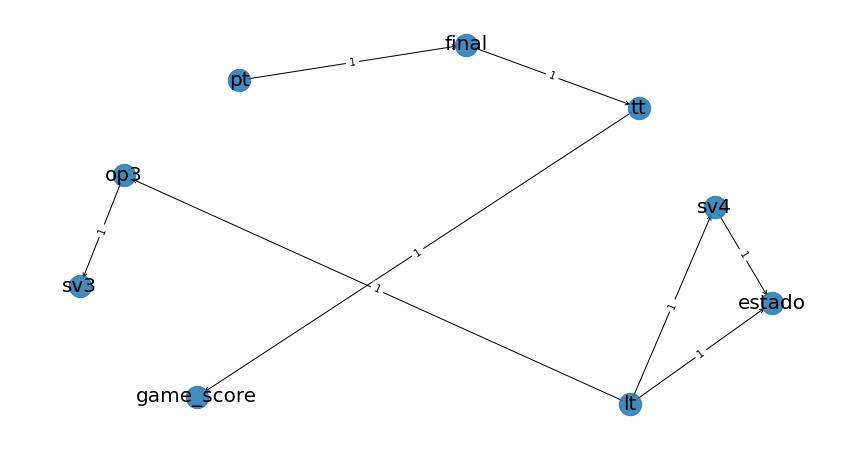

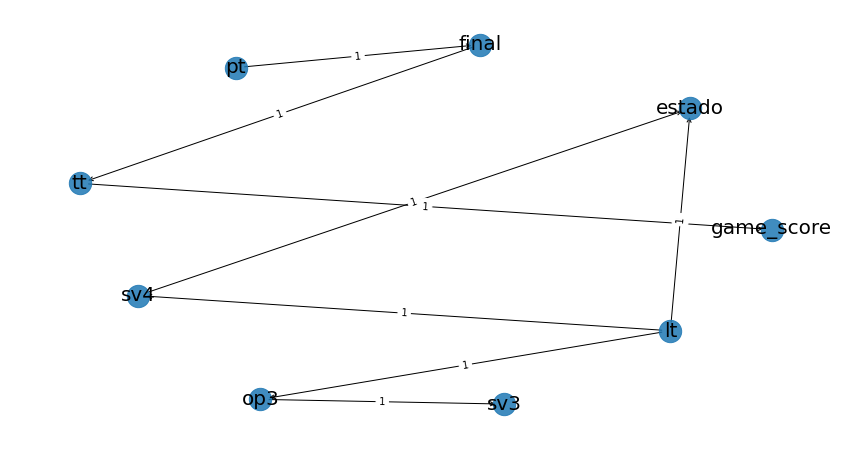


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]




0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]




0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]

COLUMNA ELIMINADA DE LA INFERENCIA:  sv1
FILA N°: 5 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op3":1, "sv3":1, "sv4":1, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4945 |
+-----------+---------------+
| estado(1) |        0.5055 |
+-----------+---------------+
FILA N°: 6 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op3":0, "sv3":0, "sv4":1, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4945 |
+-----------+---------------+
| estado(1) |        0.5055 |
+-----------+---------------+
FILA N°: 26 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op3":1, "sv3":1, "sv4":1, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+=========






0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [01:00, ?it/s]
Finding Elimination Order: : : 0it [01:10, ?it/s]

Finding Elimination Order: : : 0it [01:50, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [02:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5000 |
+-----------+---------------+
| estado(1) |        0.5000 |
+-----------+---------------+
FILA N°: 45 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op3":0, "sv3":0, "sv4":0, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5029 |
+-----------+---------------+
| estado(1) |        0.4971 |
+-----------+---------------+
FILA N°: 46 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op3":1, "sv3":1, "sv4":1, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]




0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:30, ?it/s]

Finding Elimination Order: : : 0it [01:10, ?it/s]
Finding Elimination Order: : : 0it [01:20, ?it/s]
0it [00:20, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4945 |
+-----------+---------------+
| estado(1) |        0.5055 |
+-----------+---------------+
FILA N°: 53 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op3":0, "sv3":0, "sv4":0, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5000 |
+-----------+---------------+
| estado(1) |        0.5000 |
+-----------+---------------+
FILA N°: 61 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op3":1, "sv3":1, "sv4":1, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4945 |
+-----------+---------------+
| estado(1) |        0.5055 |
+-----------+---------------+
FILA N°: 63 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "gam



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:20, ?it/s]

Finding Elimination Order: : : 0it [01:00, ?it/s]
Finding Elimination Order: : : 0it [01:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5030 |
+-----------+---------------+
| estado(1) |        0.4970 |
+-----------+---------------+
FILA N°: 65 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op3":0, "sv3":0, "sv4":1, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5117 |
+-----------+---------------+
| estado(1) |        0.4883 |
+-----------+---------------+
FILA N°: 69 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op3":0, "sv3":0, "sv4":0, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5029 |
+-----------+---------------+
| estado(1) |        0.4971 |
+-----------+---------------+
FILA N°: 71 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "gam

0it [00:20, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [01:00, ?it/s]
0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [01:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4945 |
+-----------+---------------+
| estado(1) |        0.5055 |
+-----------+---------------+
FILA N°: 84 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op3":0, "sv3":0, "sv4":1, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5117 |
+-----------+---------------+
| estado(1) |        0.4883 |
+-----------+---------------+
FILA N°: 91 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op3":0, "sv3":0, "sv4":1, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4945 |
+-----------+---------------+
| estado(1) |        0.5055 |
+-----------+---------------+
FILA N°: 96 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "gam


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]

In [ ]:
#indica cual va a ser el muestreo estratificado usando la clase "estado"
#cada fold mantiene la proporcion orignal de clases
#n_splits = el numero de experimentos a realizar
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) 
target = df.loc[:, 'estado'] #todas las filas de la columna "estado"

fold_no = 1
for train_index, test_index in skf.split(df, target):
    #Start counting.
    start_time = time()    
    #---------------------------------------------------------------------------
    #INICIO: SECCION DE ENTRENAMIENTO
    #---------------------------------------------------------------------------
    print("INICIO DE SECCION DE ENTRENAMIENTO, FOLD: ", str(fold_no))
    
    #entrega la porción de datos que serán usados como entrenamiento
    train = df.loc[train_index,:] #todas las columnas de la fila "train_index"
             
    #aprendiendo la estructura y los parametros de la porción de datos entrenados "sobre muestrados"
    modelo = bl.Aprendizaje(train, fold_no, "TRAIN")
    
    #transformando el modelo aprendido en un dataset que pueda ser inferido
    newModel = bl.modelToDataFrame(modelo, train)

    #realizando la inferencia de los datos de entrenamiento
    probTrain = bl.probabilidadConjunta(modelo, newModel, fold_no, "TRAIN")
            
    i = 0 #columna que queremos obtener
    lista_train = [fila[i] for fila in probTrain]

    #Metricas finales TRAIN
    bl.getMetrics(lista_train, train.loc[:, 'estado'], train['estado'], 'TRAIN', fold_no)
    
    print("FIN DE SECCION DE ENTRENAMIENTO, FOLD: ", str(fold_no))
    #---------------------------------------------------------------------------
    #FIN: SECCION DE ENTRENAMIENTO
    #---------------------------------------------------------------------------

    #---------------------------------------------------------------------------
    #INICIO: SECCION DE PRUEBAS
    #---------------------------------------------------------------------------
    print("INICIO DE SECCION DE PRUEBAS, FOLD: ", str(fold_no))
    
    #entrega la porción de datos que serán usados como pruebas
    test = df.loc[test_index,:] #todas las columnas de la fila "test_index"
        
    #aprendiendo la estructura y los parametros de la porción de datos de pruebas
    modelo = bl.Aprendizaje(test, fold_no, "TEST")

    #transformando el modelo aprendido en un dataset que pueda ser inferido
    newModel = bl.modelToDataFrame(modelo, test)
    
    #realizando la inferencia de los datos de prueba
    probTest = bl.probabilidadConjunta(modelo, newModel, fold_no, "TEST")
    
    ##i = 0 #columna que queremos obtener
    lista_test = [fila[i] for fila in probTest]
    
    #Metricas finales TEST
    bl.getMetrics(lista_test, test.loc[:, 'estado'], test['estado'], 'TEST', fold_no)

    print("FIN DE SECCION DE PRUEBAS, FOLD: ", str(fold_no))
    #---------------------------------------------------------------------------
    #FIN: SECCION DE PRUEBAS
    #---------------------------------------------------------------------------
    
    # Calculate the elapsed time.
    elapsed_time = time() - start_time
    print("Elapsed time: %0.10f seconds." % elapsed_time)
    
    #Cambiando de fold
    fold_no += 1